In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

85.46073121949524 32.08403630065368
17.702152331538628 35.436877377665695
-87.68915615198567 69.48325886258348
37.04864710633912 29.415216815414368
-9.79418068265963 -44.28989532994984
-24.77984949879891 66.97004418283143
-49.9087308046428 158.59842535526138
5.708858469930547 -24.895997557770016
-23.94233712748374 -25.288732151261456
-68.18174783612662 -156.35426578217928
14.441166237493007 147.74587301350937
-82.83755701535877 128.03833198027576
-50.2584114321009 -126.51280213833522
33.27880903716371 158.4757713558672
13.01824439405057 120.91227319562051
-67.98871717481016 -49.08297045633091
-53.10942347776312 -128.55291611356736
86.55917698835225 171.31854286580773
18.403129801039455 -162.05442130767096
78.33652005385423 123.66978879804282
22.358185316855284 135.8386934937737
47.874031098650846 32.80815218863691
-4.079409564593064 -9.32778961042385
45.54783096020034 -102.30536449914386
54.38770507474396 114.13867362031726
27.84769381320187 100.97089945351848
25.589747235097448 -60.38

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berlevag
Processing Record 2 of Set 1 | barbar
City not found. Skipping...
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | fethiye
Processing Record 5 of Set 1 | bom jesus
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | barahan
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | kazanka
Processi

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Berlevag,70.8578,29.0864,51.80,93,100,19.57,NO,2022-07-16 23:50:52
1,Fethiye,36.6217,29.1164,69.67,36,0,6.29,TR,2022-07-16 23:50:52
2,Bom Jesus,-9.0744,-44.3586,73.92,41,4,2.95,BR,2022-07-16 23:50:53
3,Bambous Virieux,-20.3428,57.7575,70.05,73,40,13.80,MU,2022-07-16 23:50:53
4,Tuatapere,-46.1333,167.6833,45.90,89,100,10.16,NZ,2022-07-16 23:50:53
5,Sao Filipe,14.8961,-24.4956,75.63,84,13,8.63,CV,2022-07-16 23:50:54
6,Caravelas,-17.7125,-39.2481,70.23,87,3,4.79,BR,2022-07-16 23:50:54
7,Mataura,-46.1927,168.8643,48.47,74,100,4.59,NZ,2022-07-16 23:50:33
8,Airai,-8.9266,125.4092,61.41,78,82,4.05,TL,2022-07-16 23:50:55
9,New Norfolk,-42.7826,147.0587,53.92,80,98,4.00,AU,2022-07-16 23:50:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Berlevag,NO,2022-07-16 23:50:52,70.8578,29.0864,51.80,93,100,19.57
1,Fethiye,TR,2022-07-16 23:50:52,36.6217,29.1164,69.67,36,0,6.29
2,Bom Jesus,BR,2022-07-16 23:50:53,-9.0744,-44.3586,73.92,41,4,2.95
3,Bambous Virieux,MU,2022-07-16 23:50:53,-20.3428,57.7575,70.05,73,40,13.80
4,Tuatapere,NZ,2022-07-16 23:50:53,-46.1333,167.6833,45.90,89,100,10.16
5,Sao Filipe,CV,2022-07-16 23:50:54,14.8961,-24.4956,75.63,84,13,8.63
6,Caravelas,BR,2022-07-16 23:50:54,-17.7125,-39.2481,70.23,87,3,4.79
7,Mataura,NZ,2022-07-16 23:50:33,-46.1927,168.8643,48.47,74,100,4.59
8,Airai,TL,2022-07-16 23:50:55,-8.9266,125.4092,61.41,78,82,4.05
9,New Norfolk,AU,2022-07-16 23:50:55,-42.7826,147.0587,53.92,80,98,4.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

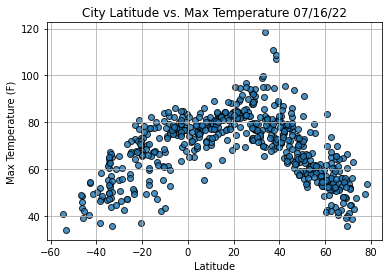

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

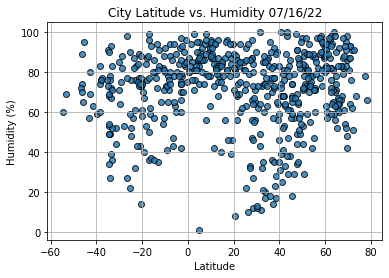

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

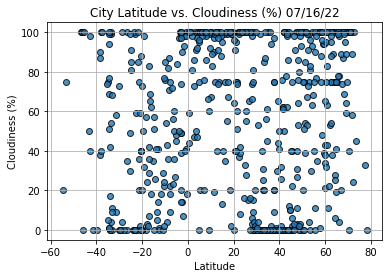

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

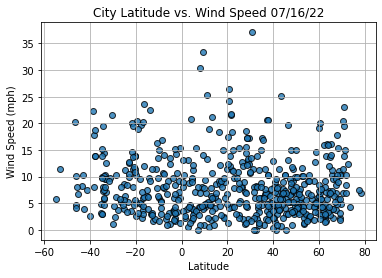

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2022-07-16 23:50:56
Lat                       69.7008
Lng                      170.3133
Max Temp                    35.49
Humidity                       98
Cloudiness                    100
Wind Speed                  10.27
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Berlevag,NO,2022-07-16 23:50:52,70.8578,29.0864,51.80,93,100,19.57
1,Fethiye,TR,2022-07-16 23:50:52,36.6217,29.1164,69.67,36,0,6.29
5,Sao Filipe,CV,2022-07-16 23:50:54,14.8961,-24.4956,75.63,84,13,8.63
11,Barahan,PH,2022-07-16 23:50:56,13.0121,120.7620,82.60,75,100,1.83
13,Pevek,RU,2022-07-16 23:50:56,69.7008,170.3133,35.49,98,100,10.27


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

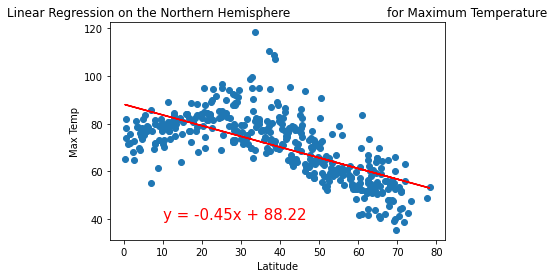

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

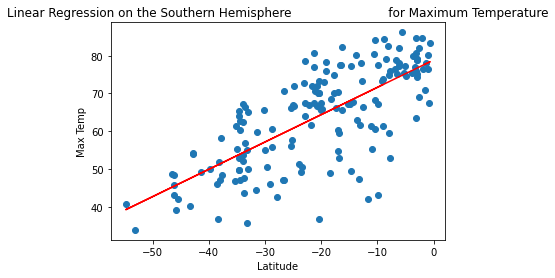

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

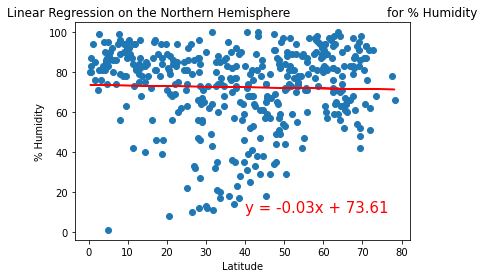

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

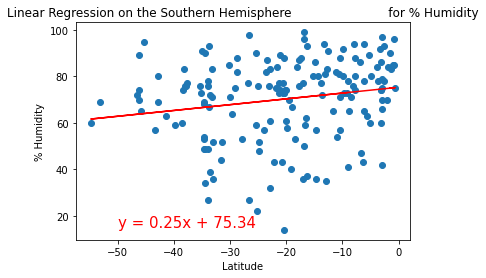

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

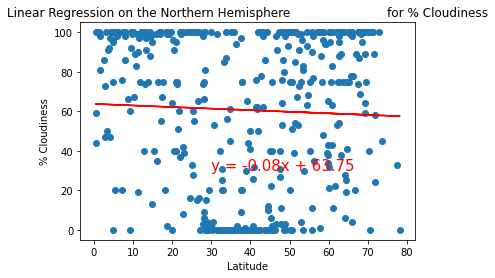

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,30))

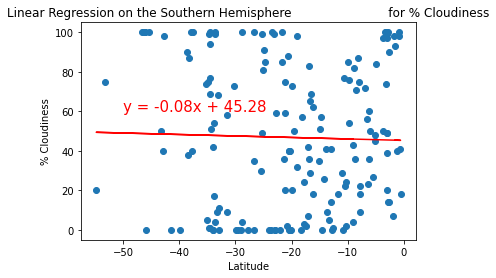

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

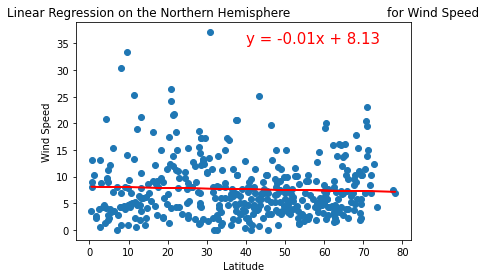

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

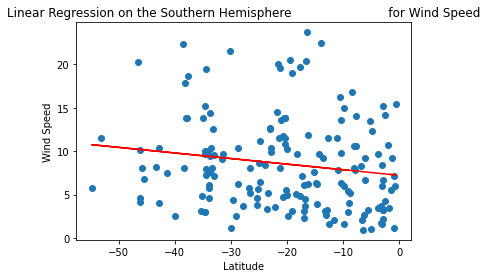

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))